In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRFRegressor
from sklearn.metrics import r2_score, mean_squared_error
file='housing.csv'


In [176]:
df=pd.read_csv(file)
df.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1
216,0.04560,0.0,13.89,1,0.550,5.888,56.0,3.1121,5,276,16.4,392.80,13.51,23.3
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329,12.6,354.31,8.61,30.3
22,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307,21.0,396.90,18.72,15.2
193,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265,15.6,393.37,5.03,31.1


In [177]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [178]:
df.shape
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [179]:
abs(df.corr()['medv']).sort_values()

chas       0.175260
dis        0.249929
b          0.333461
zn         0.360445
age        0.376955
rad        0.381626
crim       0.388305
nox        0.427321
tax        0.468536
indus      0.483725
ptratio    0.507787
rm         0.695360
lstat      0.737663
medv       1.000000
Name: medv, dtype: float64

In [180]:
df.skew().sort_values()

b         -2.890374
ptratio   -0.802325
age       -0.598963
indus      0.295022
rm         0.403612
tax        0.669956
nox        0.729308
lstat      0.906460
rad        1.004815
dis        1.011781
medv       1.108098
zn         2.225666
chas       3.405904
crim       5.223149
dtype: float64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'chas'}>,
        <AxesSubplot:title={'center':'crim'}>],
       [<AxesSubplot:title={'center':'dis'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'rm'}>],
       [<AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'zn'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

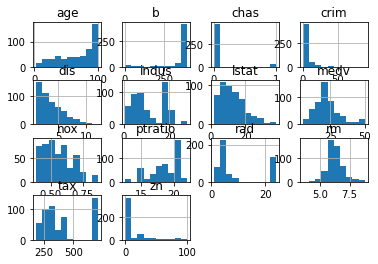

In [181]:
df.hist()

<AxesSubplot:>

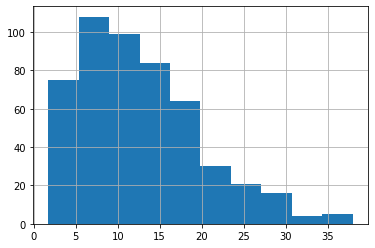

In [182]:
df.lstat.hist()

<AxesSubplot:>

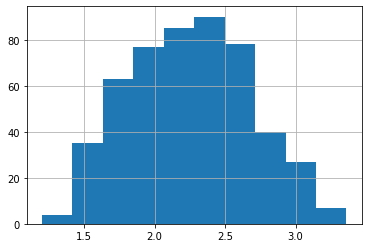

In [183]:
df['lstat_transformed']=np.cbrt(df.lstat)
np.cbrt(df.lstat).hist()

<AxesSubplot:>

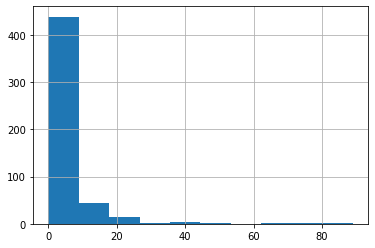

In [184]:
df.crim.hist()

<AxesSubplot:>

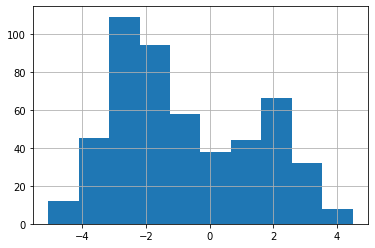

In [185]:
df['crim_transformed']=np.log(df.crim)
np.log(df.crim).hist()

<AxesSubplot:ylabel='Frequency'>

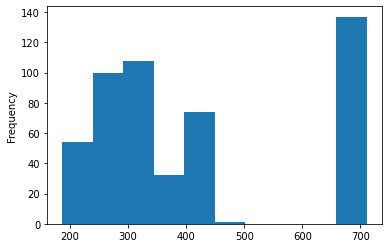

In [186]:
df.tax.plot(kind="hist")

<AxesSubplot:>

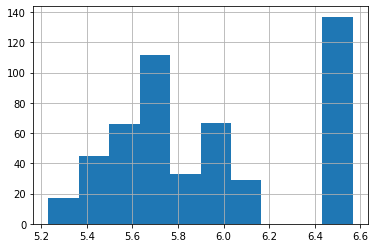

In [187]:
df['tax_transformed']=np.log(df.tax)
np.log(df.tax).hist()

In [188]:
df.corr()['medv']

crim                -0.388305
zn                   0.360445
indus               -0.483725
chas                 0.175260
nox                 -0.427321
rm                   0.695360
age                 -0.376955
dis                  0.249929
rad                 -0.381626
tax                 -0.468536
ptratio             -0.507787
b                    0.333461
lstat               -0.737663
medv                 1.000000
lstat_transformed   -0.797527
crim_transformed    -0.454302
tax_transformed     -0.474701
Name: medv, dtype: float64

<AxesSubplot:ylabel='Frequency'>

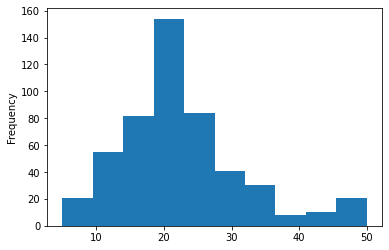

In [189]:
df.medv.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

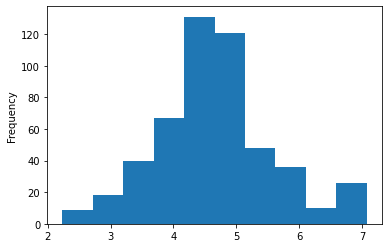

In [190]:
y1=np.sqrt(df.medv)
np.sqrt(df.medv).plot(kind="hist")

In [191]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv', 'lstat_transformed',
       'crim_transformed', 'tax_transformed'],
      dtype='object')

In [214]:
y=df.medv
#y=y1
#X=df[['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad','ptratio', 'b', 'lstat_transformed', 'crim_transformed', 'tax_transformed']]
X=df[['zn', 'indus', 'chas', 'nox', 'rm', 'dis', 'rad','ptratio', 'b', 'lstat', 'crim', 'tax']]
#age has no impact
X1=StandardScaler().fit_transform(X)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.2, random_state=21)

In [216]:
rt=RandomForestRegressor(max_depth=10)
rt.fit(X_train, y_train)
yhat_r=rt.predict(X_test)
print(r2_score(y_test, yhat_r))
print(mean_squared_error(y_test, yhat_r))

0.8862129498939946
10.707727580914902


In [227]:
xg_model=XGBRFRegressor(max_depth=11, n_estimators=200)
xg_model.fit(X_train, y_train)
yhat_x=xg_model.predict(X_test)
print(r2_score(y_test, yhat_x))
print(mean_squared_error(y_test, yhat_x))

0.8939251409882174
9.981985581170962


In [226]:

param_grid = dict(n_estimators=np.array([50,100,150,200]))
model = GradientBoostingRegressor(random_state=7)
kfold = KFold(n_splits=10, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

c:\python36\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -10.863621 using {'n_estimators': 200}
-11.971688 (4.689598) with: {'n_estimators': 50}
-11.089725 (4.718247) with: {'n_estimators': 100}
-10.907282 (4.865210) with: {'n_estimators': 150}
-10.863621 (4.860367) with: {'n_estimators': 200}


In [96]:
lm=LinearRegression()
lm.fit(X_train, y_train)
yhat_r=lm.predict(X_test)
print(r2_score(y_test, yhat_r))
print(mean_squared_error(y_test, yhat_r))

0.7586802223938927
0.2404500720929044
